<a href="https://colab.research.google.com/github/shay2222/Arrays-two-dimensional-/blob/main/Water_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quality Analysis

**Purpose**: The goal of this project is to  take raw data that is disorganized and create proper categories for the values like Chloramines, Solids, Sulfate, Hardness, ph, Conductivity, Organic Carbon, Turbidity, Trihalomethanes, and Potability. The data visualizations  created by analyzing the raw data are of different forms and display specific information that is easier to understand.

The initial start of the code:

* pandas is used for data manipulation and analysis
* seaborn and matplotlib provide visualization capabilities
* StandardScaler helps normalize our features
* RandomForestClassifier is a powerful ML algorithm for classification
* classification_report gives us precision, recall, and F1 scores
* confusion_matrix shows how well our model predicted the classes
* roc_curve and auc help evaluate model performance on the classification task


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv"
data = pd.read_csv(url)

# Display basic information about the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nData types and missing values:")
print(data.info())

First few rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10

In [ ]:
# Data preprocessing
data = data.dropna()  # Remove rows with missing values
X = data.drop('Potability', axis=1)  # Features (all columns except target)
y = data['Potability']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

The main aspects of the machine learning model:
* Initialize a Random Forest classifier with 100 decision trees
* Train the model on our scaled training data
* Make predictions on our test set using the trained model

# Data Visualizations


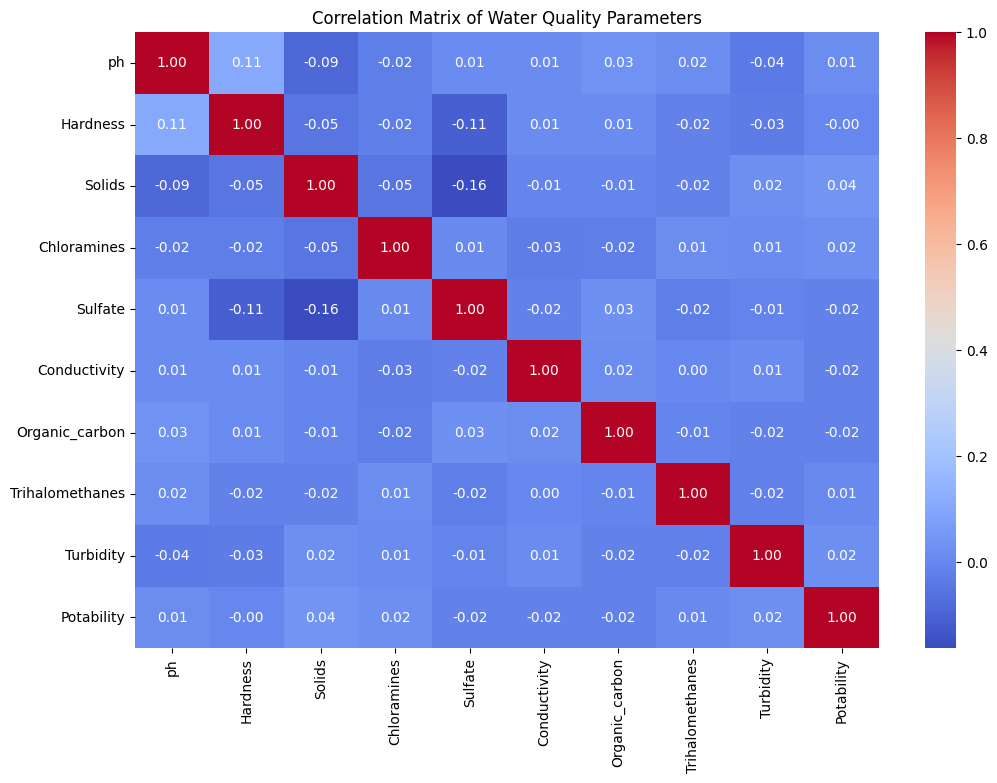

In [ ]:
# Correlation matrix visualization
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Water Quality Parameters')
plt.show()

Correlation matrix visualization

**What is shown**: The correlation between different water quality parameters

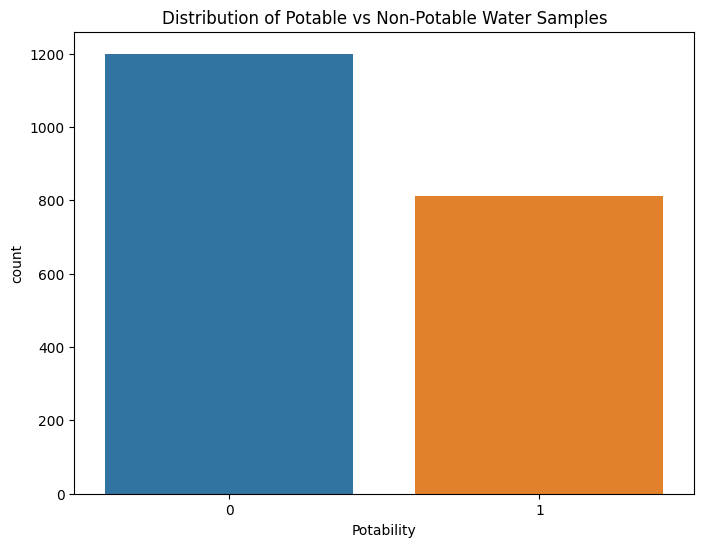

In [ ]:
# Distribution of potable and non-potable water samples
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=data)
plt.title('Distribution of Potable vs Non-Potable Water Samples')
plt.show()

Distribution of potable and non-potable water samples

**What is shown**: Number of potable (1) vs non-potable (0) samples in the dataset



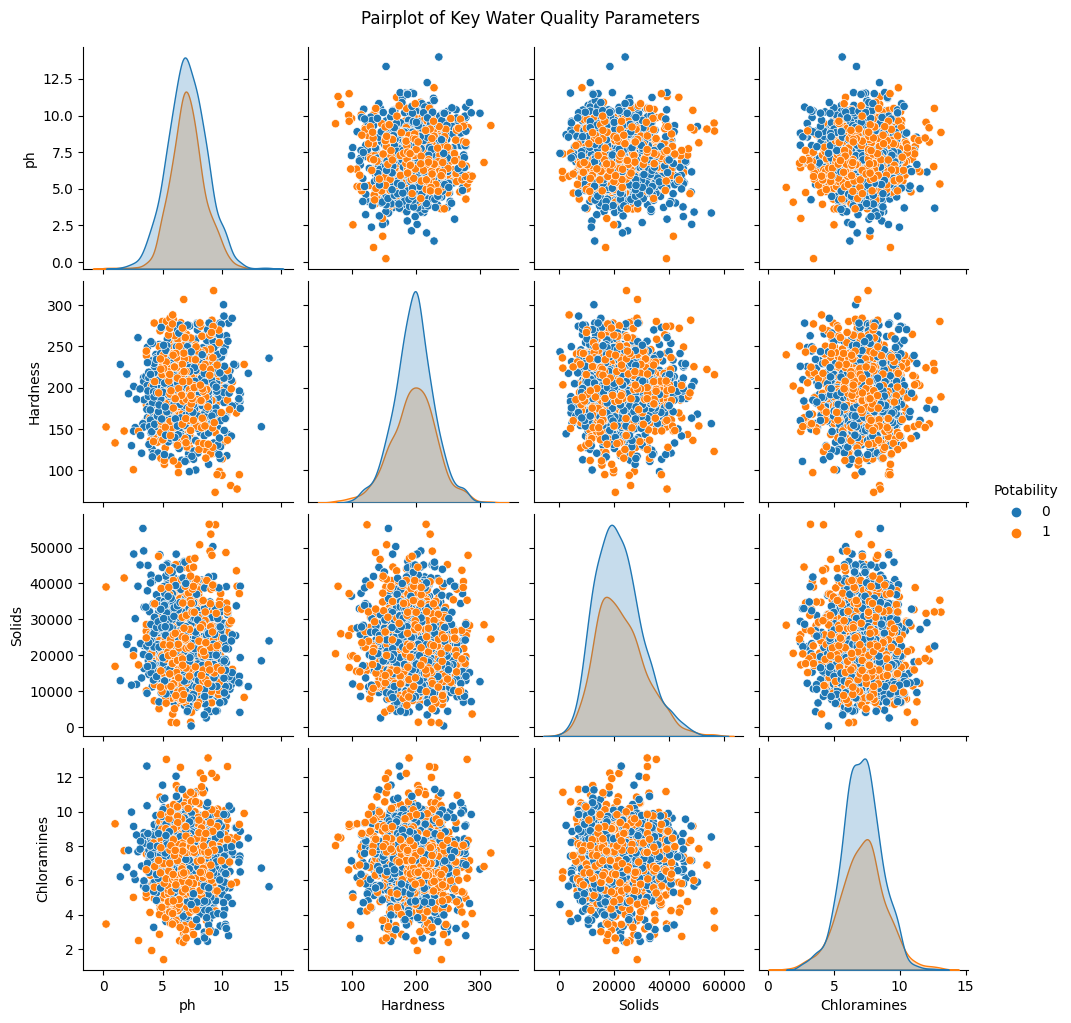

In [ ]:
# Pairplot of selected features
sns.pairplot(data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Potability']], hue='Potability')
plt.suptitle('Pairplot of Key Water Quality Parameters', y=1.02)
plt.show()

Pairplot of selected features

**What is shown**: Scatter plots of pairs of features to examine clustering patterns

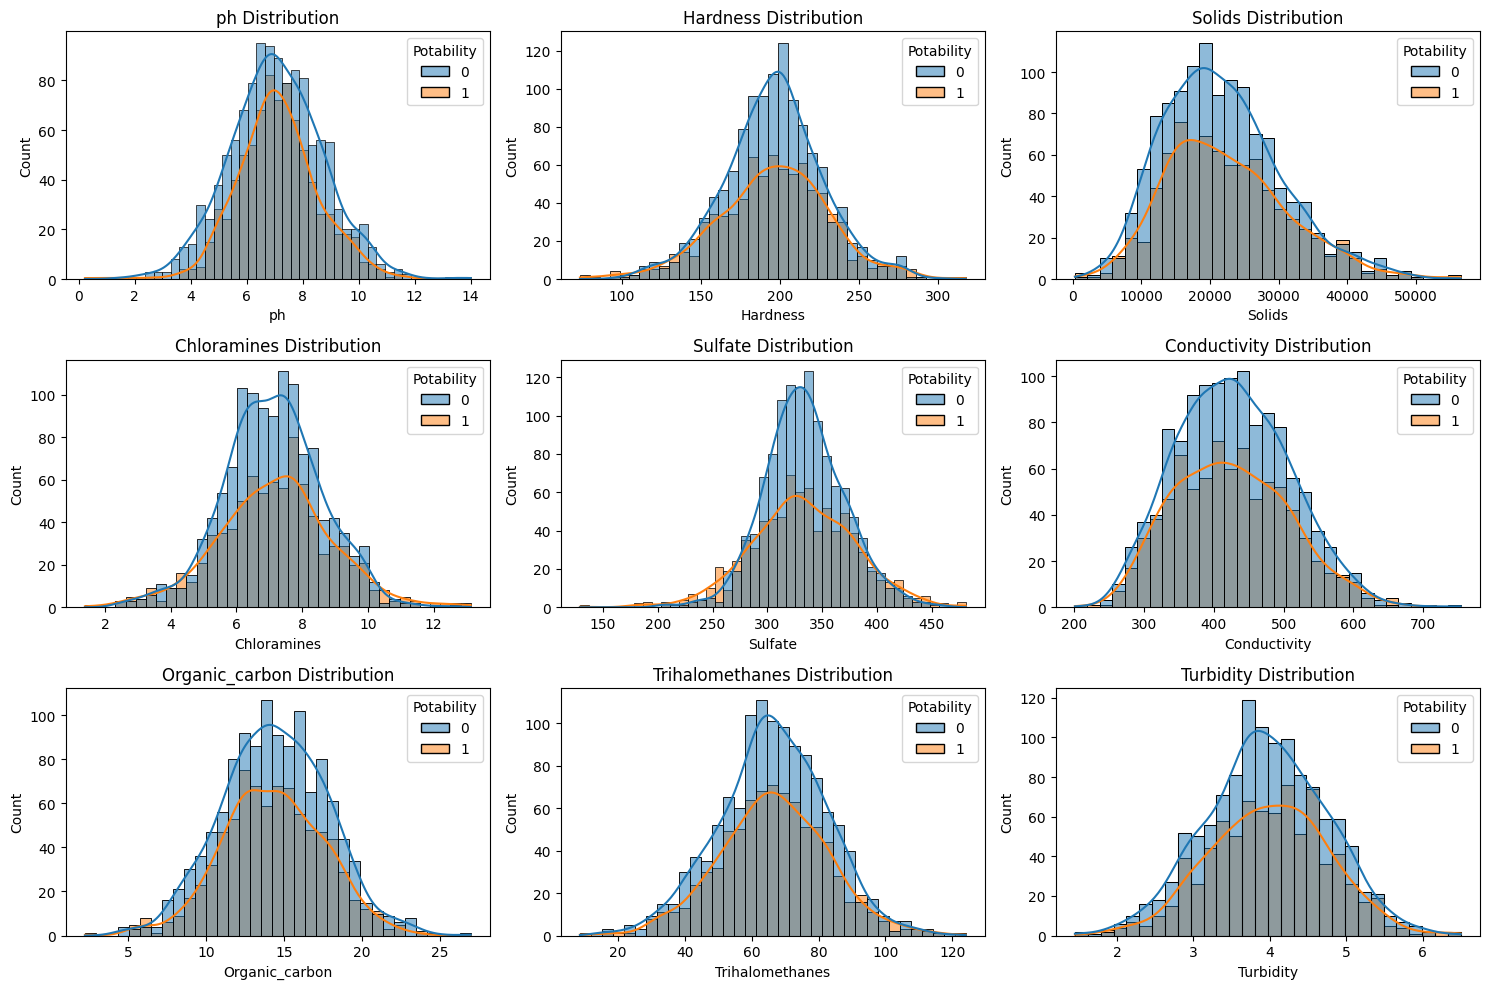

In [ ]:
# Feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=col, hue='Potability', kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

Feature distributions

**What is shown**: Distribution of each feature (excluding target) with potability indication

Model performance on test set:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403



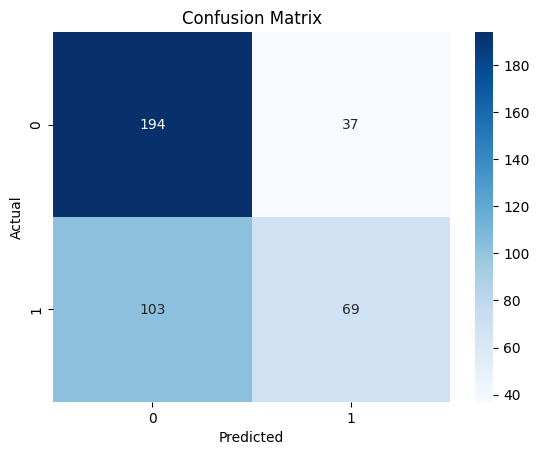

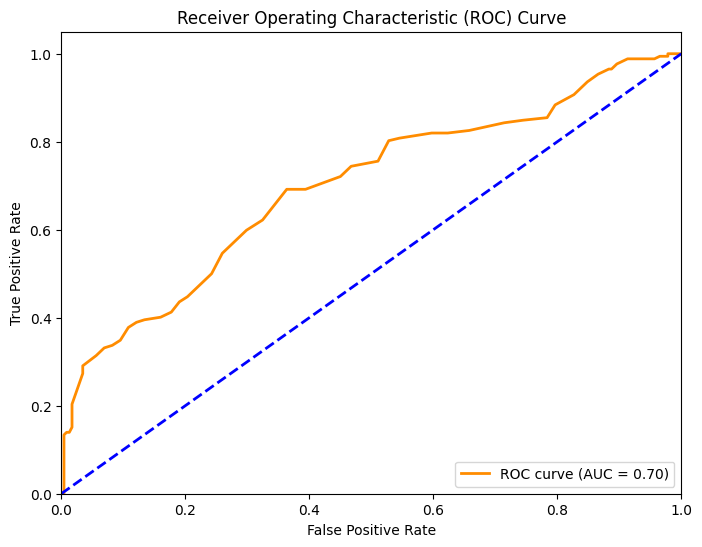

In [ ]:
# Classification metrics
print("Model performance on test set:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Significant parts of above code:


* classification_report gives us precision, recall, and F1 scores for our model
* confusion_matrix shows how well our model predicted the classes
* roc_curve and auc provide a visual representation of our model's performance


# Machine Learning Engineer 5 Data Model

1. Feature Importance Analysis
2. Anomaly Detection Model (Isolation Forest)
3. Probability Calibration (Calibration Curve)
4. Clustering Analysis Using PCA
5. Cross-Validation Analysis

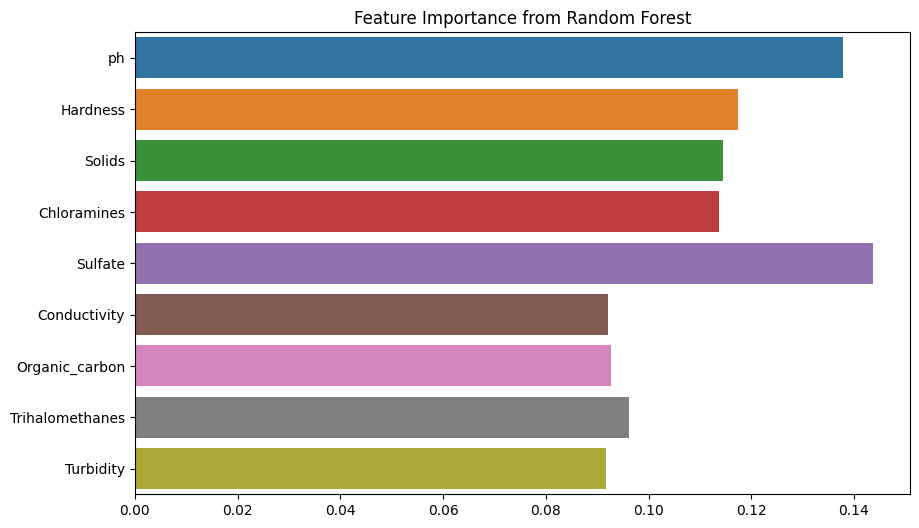

In [ ]:
#Feature Importance Analysis
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()

**Feature Importance Analysis**

* Helps prioritize features for further analysis or data collection.
* Indicates if certain parameters (e.g., ph, Sulfate) can be removed without harming model performance if they have low importance.


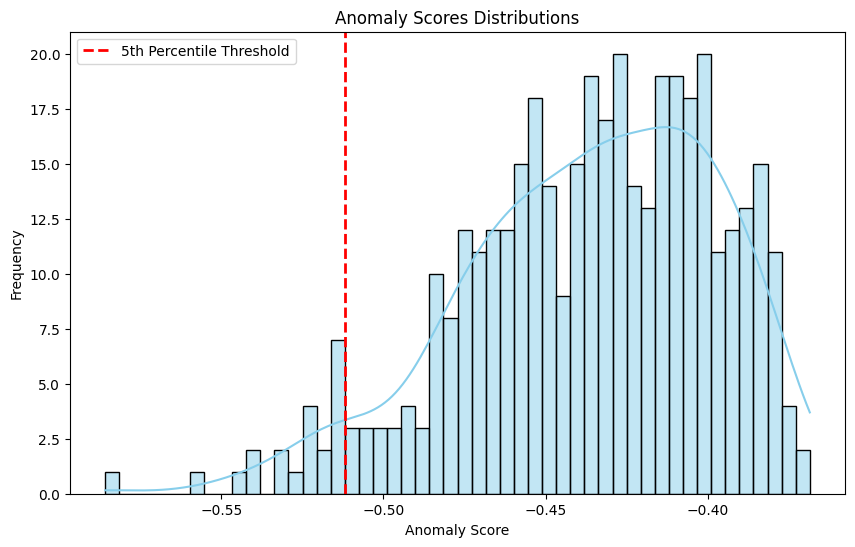

In [ ]:
#Anomaly Detection Model
# Train an Isolation Forest anomaly detection model on scaled training data
from sklearn.ensemble import IsolationForest

if_model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
if_model.fit(X_train_scaled)  # Fit only on training data

# Detect anomalies in testing data
anomalies = if_model.predict(X_test_scaled)
anomaly_scores = if_model.score_samples(X_test_scaled)  # Score of outliers

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, kde=True, bins=50, color='skyblue')
plt.axvline(np.percentile(anomaly_scores, 5), color='red', linestyle='dashed', linewidth=2, label='5th Percentile Threshold')
plt.title('Anomaly Scores Distributions')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Anomaly Detection Model**

* Anomalies might represent water samples with unusual chemical compositions that could indicate contamination or measurement errors.
* The model identifies outliers based on feature distribution patterns.
* Visualizing scores helps identify which samples are flagged as anomalies.

<Figure size 1000x600 with 0 Axes>

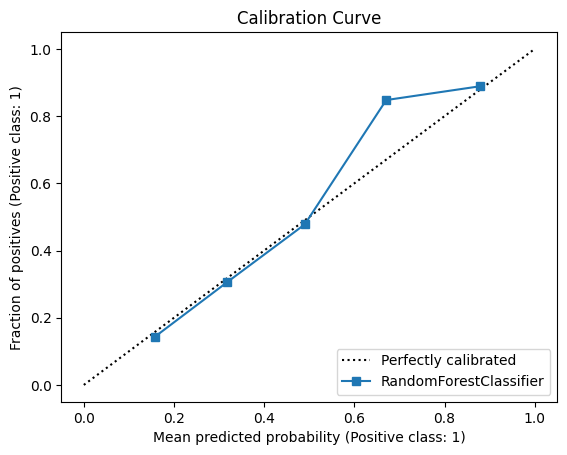

In [ ]:
# Probability Calibration
from sklearn.calibration import CalibrationDisplay

plt.figure(figsize=(10, 6))
disp = CalibrationDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Calibration Curve')
plt.show()


**Probability Calibration**


* A well-calibrated model ensures that the predicted probability aligns with real-world accuracy (e.g., a 0.7 probability means the event happens 70% of the time).
* If the calibration curve is not diagonal, it indicates the model is overconfident/underconfident in its predictions.

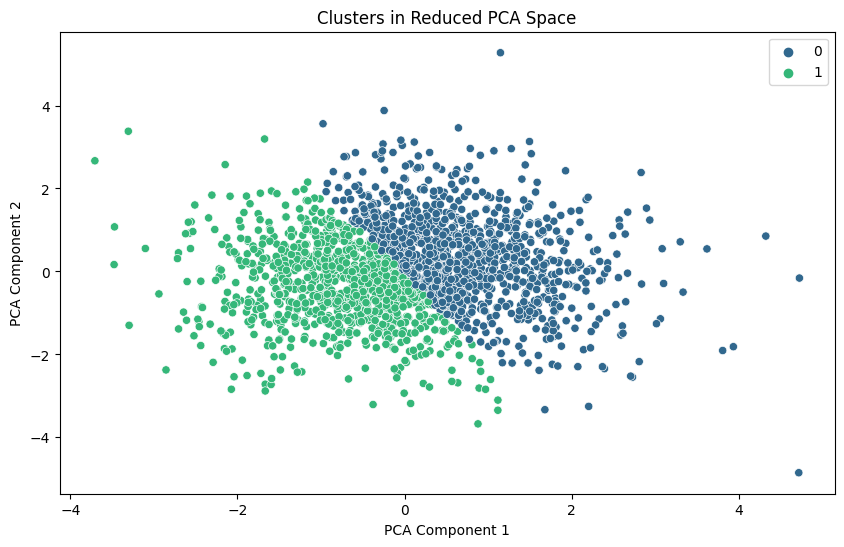

In [ ]:
# Cluster Analysis Using PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Scale the full dataset (train and test) for PCA
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X)  # Scale all features except 'Potability'

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train KMeans on reduced PCA data
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters in Reduced PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**Clustering Analysis Using PCA**

* Group water samples into clusters based on feature similarity (without using the Potability label).
* Helps identify patterns in the data, like whether potable and non-potable samples naturally cluster apart or mix.
* PCA reduces dimensionality (from 10 features to 2) to visualize clusters.


In [ ]:
#Cross-validation Analysis
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation accuracy: {np.mean(cv_scores):.2f}")

Cross-validation scores: [0.6863354  0.6552795  0.66770186 0.66666667 0.67601246]
Average cross-validation accuracy: 0.67


**Cross-validation Analysis**

* Provides a more reliable performance estimate than a single train-test split.
* Highlights model consistency across different data subsets.
* Tests how well the model generalizes to unseen data.


# Advance Data Model:
1) Hyperparameter Tuning
2) Error Analysis
3) Gradient Boosting
4) Ensemble of Models
5) Performance Comparison with AUC-ROC
6) Advanced Clustering Visualization

**1. Hyperparameter Tuning using GridSearch CV**


* GridSearchCV systematically explores the best hyperparameters for our Random Forest model.
* Focuses on hyperparameters like n_estimators (number of trees), max_depth (tree depth), and min_samples_split (minimum samples per split).
* The n_jobs=-1 uses all available CPU cores for faster computation.
* By cross-validation, we ensure the best hyperparameters generalize well to unseen data


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the Random Forest classifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                         param_grid,
                         cv=5,
                         scoring='accuracy',
                         n_jobs=-1)

# Fit the grid search on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and corresponding score
print("Best Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best model score: {grid_search.best_score_:.2f} (CV Accuracy)")

# Save the best model
best_model = grid_search.best_estimator_

Best Hyperparameters from GridSearchCV:
{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}
Best model score: 0.68 (CV Accuracy)


**2. Error Analysis for Misclassified Samples**


* False Positives (FP): Non-potable samples incorrectly labeled as potable.
* False Negatives (FN): Potable samples incorrectly labeled as non-potable.
* The violinplot shows feature distributions of FP, FN, and the overall dataset, helping to identify patterns where misclassification occurs.
* For example, high Turbidity or Sulfate might be causing FP/FN.


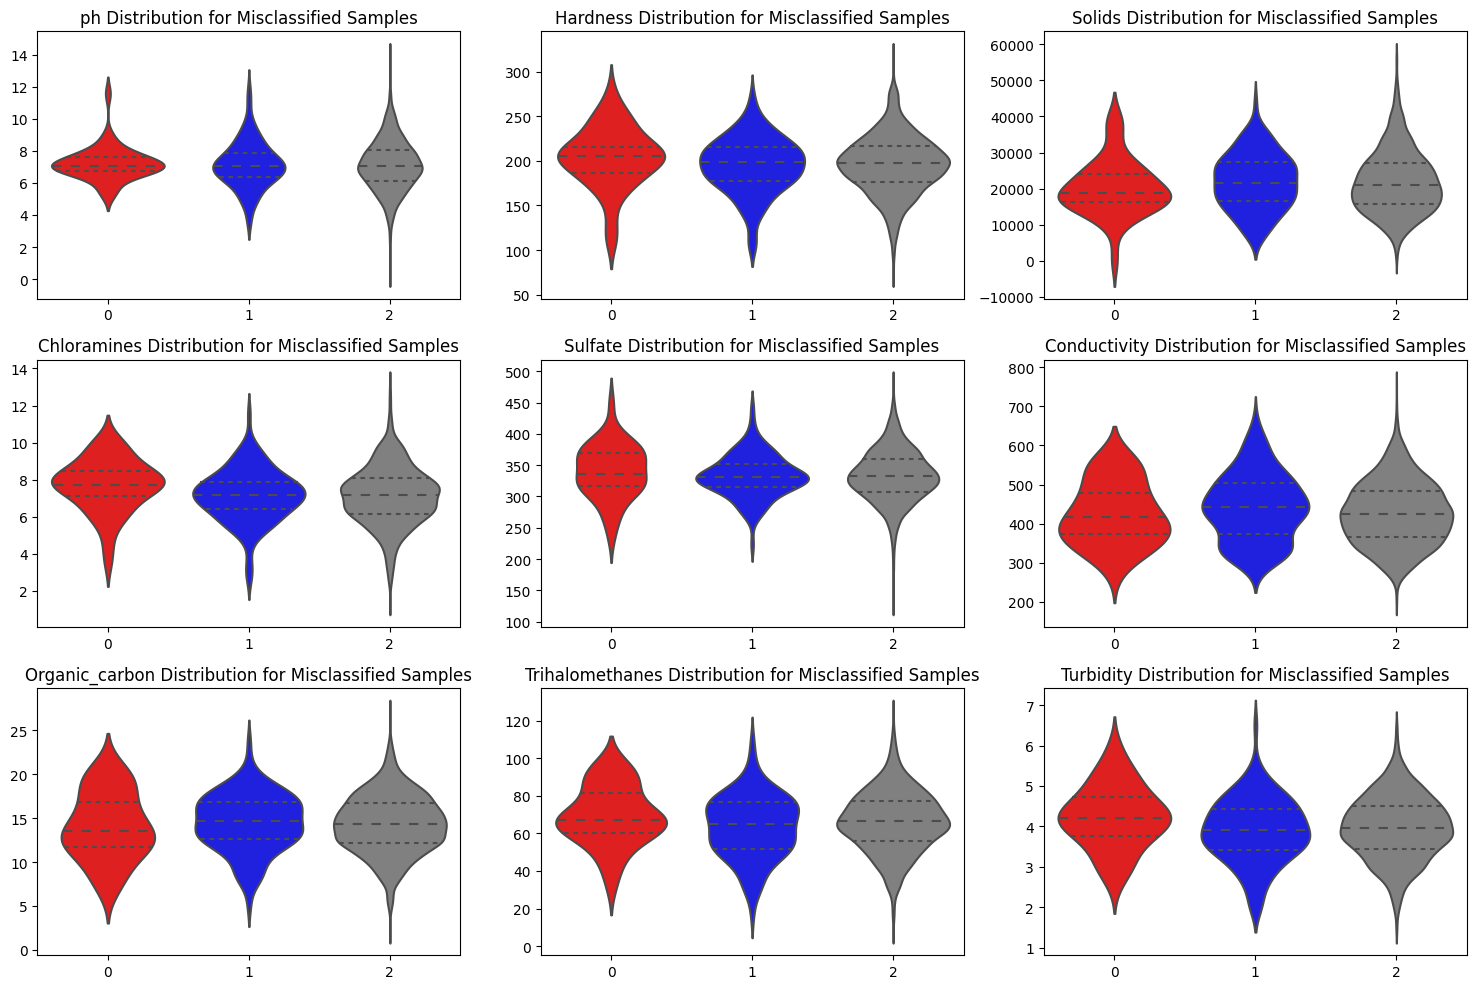

In [ ]:
#Error Analysis for Misclassified Samples
# Get misclassified samples in test set
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_data = X_test.iloc[misclassified_indices]
misclassified_labels = y_test.iloc[misclassified_indices]

# Separate false positives (FP) and false negatives (FN)
fp_indices = np.where((y_pred == 1) & (y_test == 0))[0]
fn_indices = np.where((y_pred == 0) & (y_test == 1))[0]

fp_data = X_test.iloc[fp_indices]
fn_data = X_test.iloc[fn_indices]

# Visualize feature distributions for misclassified samples
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[0:-1]):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=[fp_data[col], fn_data[col], data[col]], palette=["red", "blue", "gray"], inner="quartile")
    plt.title(f'{col} Distribution for Misclassified Samples')
plt.tight_layout()
plt.show()

**3. Gradient Boosting with XGBoost for Classification**


Why use XGBoost?


* It's a strong gradient boosting algorithm that often outperforms Random Forest in classification tasks.
* Handles imbalanced data better when applied with appropriate parameters (though SMOTE can still be used for balancing).
* The use_label_encoder=False avoids warnings if the label encoder is not used.


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation with XGBoost
xgb_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)
print(f"XGBoost Cross-Validation Accuracy: {np.mean(xgb_scores):.2f} (±{np.std(xgb_scores):.2f})")

# Train XGBoost with best parameters
xgb_best = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200, max_depth=6, random_state=42)
xgb_best.fit(X_train_scaled, y_train)

# Evaluate
y_pred_xgb = xgb_best.predict(X_test_scaled)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Cross-Validation Accuracy: 0.64 (±0.02)
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       231
           1       0.57      0.48      0.52       172

    accuracy                           0.63       403
   macro avg       0.61      0.61      0.61       403
weighted avg       0.62      0.63      0.62       403



**4. Ensemble of Models (VotingClassifier)**

Why use ensemble models?


* Combines predictions from multiple models (Random Forest, XGBoost, MLP, etc.) for better accuracy and robustness.
* voting='soft' uses predicted probabilities, unlike voting='hard' which uses majority voting.


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Create and train base models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# Combine models using VotingClassifier
voting_model = VotingClassifier(
    estimators=[
        ('rf', best_model),  # Random Forest with tuned parameters
        ('xgb', xgb_best),  # XGBoost model
        ('mlp', best_mlp),  # MLP model
        ('dt', dt_model),  # Decision Tree
        ('lr', lr_model)   # Logistic Regression
    ],
    voting='soft',  # Use probability scores
    n_jobs=-1
)

# Train and evaluate
voting_model.fit(X_train_scaled, y_train)
y_pred_vote = voting_model.predict(X_test_scaled)
print("Ensemble Model Classification Report:")
print(classification_report(y_test, y_pred_vote))

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       231
           1       0.62      0.48      0.54       172

    accuracy                           0.65       403
   macro avg       0.64      0.63      0.63       403
weighted avg       0.65      0.65      0.64       403



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



**5. Performance Comparison with AUC-ROC**

* Compares various models' AUC scores visually.
* Helps choose the best-performing model for the imbalanced dataset.
* For imbalanced data, FPR and TPR at different thresholds should be inspected carefully.


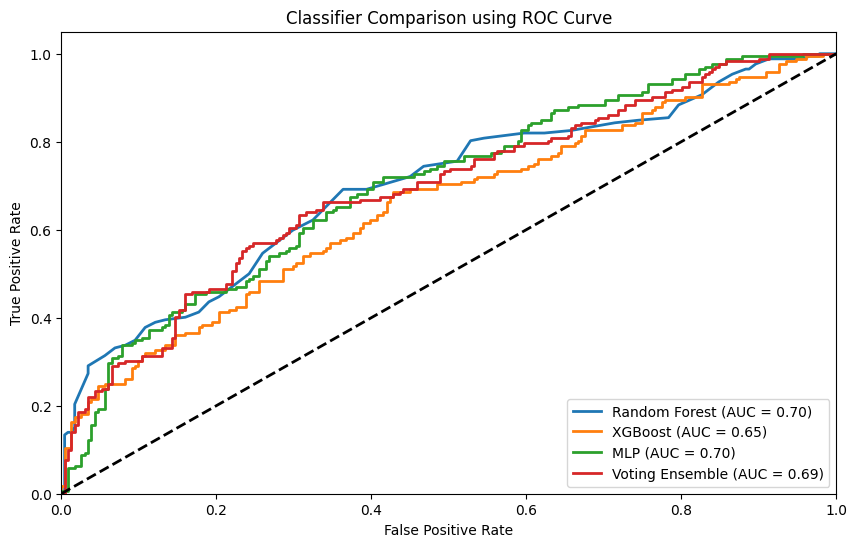

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Store models and their predictions
models = {
    'Random Forest': model,
    'XGBoost': xgb_best,
    'MLP': best_mlp,
    'Voting Ensemble': voting_model
}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot baseline (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifier Comparison using ROC Curve')
plt.legend(loc="lower right")
plt.show()

**6. t-SNE or UMAP for Advanced Clustering Visualization**

Why t-SNE/UMAP?


* These **non-linear dimensionality reduction** methods better handle complex, non-linear data.
* UMAP is faster and can be more effective than t-SNE for high-dimensional data.
* Helps identify **clustering or separation** of potable vs non-potable samples


2025-08-21 00:56:49.535351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755737809.786677      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755737809.859055      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


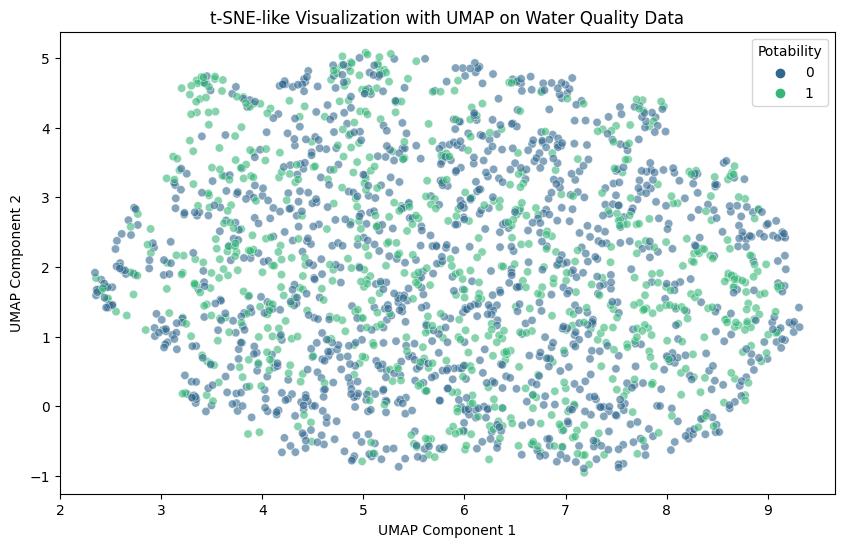

In [ ]:
import umap.umap_ as umap

# Apply PCA + UMAP to project to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled_all)

# Plot clusters in UMAP space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=data['Potability'], palette='viridis', alpha=0.6)
plt.title("t-SNE-like Visualization with UMAP on Water Quality Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Potability")
plt.show()